In [5]:
import pandas as pd
import numpy as np
efficiency = pd.read_csv("ENB2012_data.csv")
efficiency.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']


In [9]:
efficiency.head(5)

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
efficiency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [11]:
efficiency.describe().T

,count,mean,std,min,25%,50%,75%,max
relative_compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
surface_area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
wall_area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
roof_area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
overall_height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
glazing_area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
glazing_area_distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
heating_load,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
cooling_load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [7]:
efficiency.isnull().sum()

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

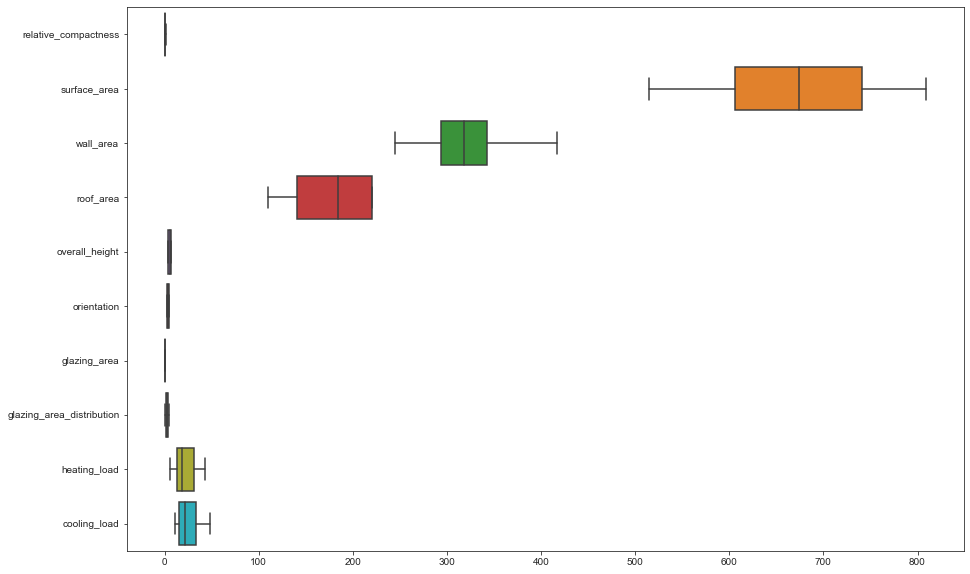

In [9]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax=sns.boxplot(data = efficiency, orient="h", ax=ax)


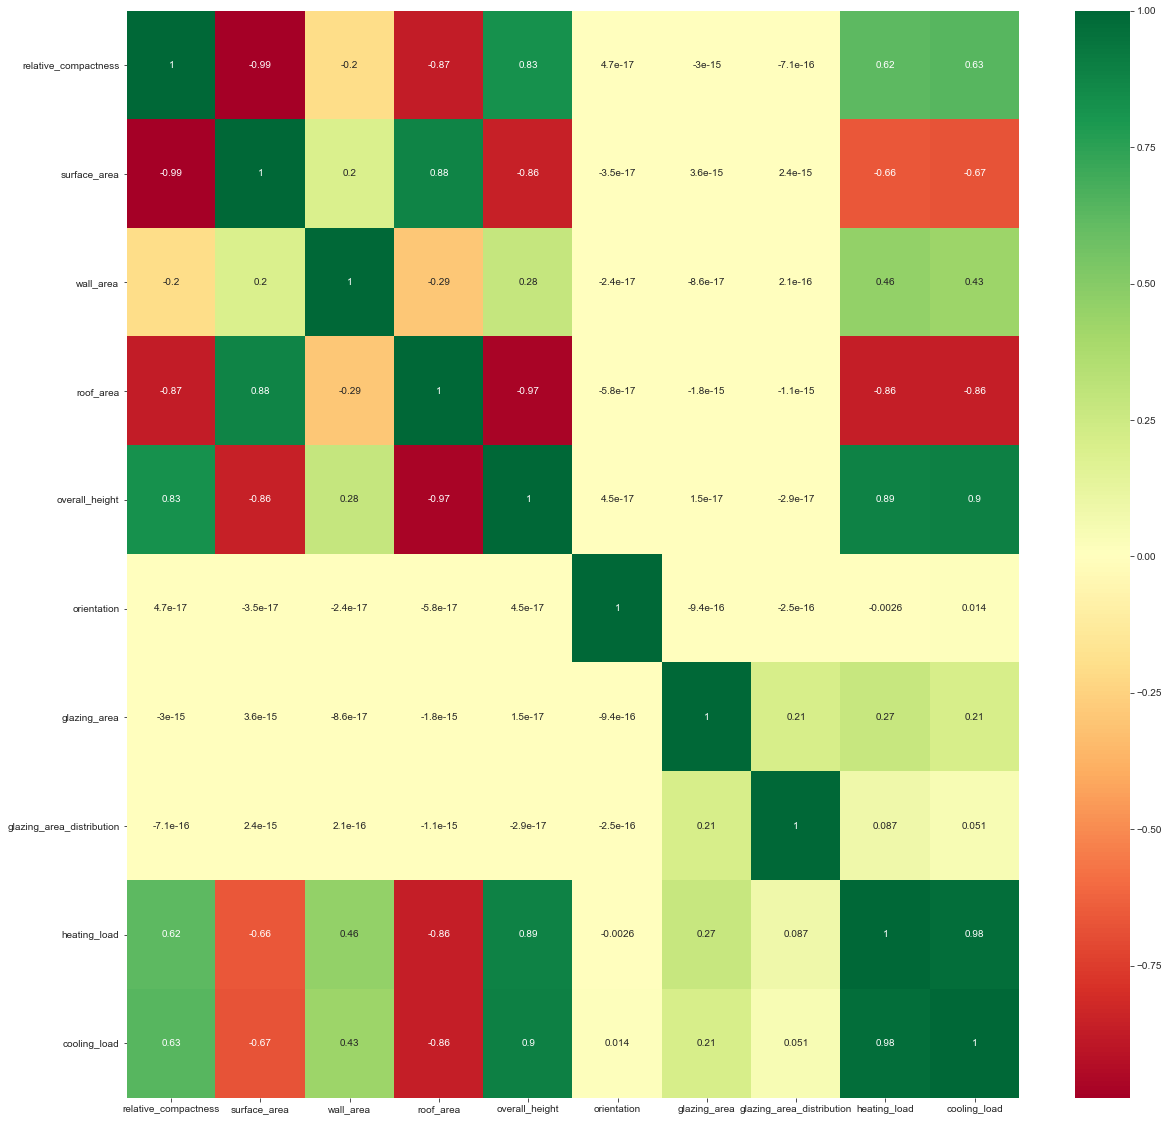

In [10]:
#Değişkenler arasındaki korelasyon
corrmat = efficiency.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(efficiency[top_corr_features].corr(),annot=True,cmap="RdYlGn")


<Figure size 360x360 with 0 Axes>

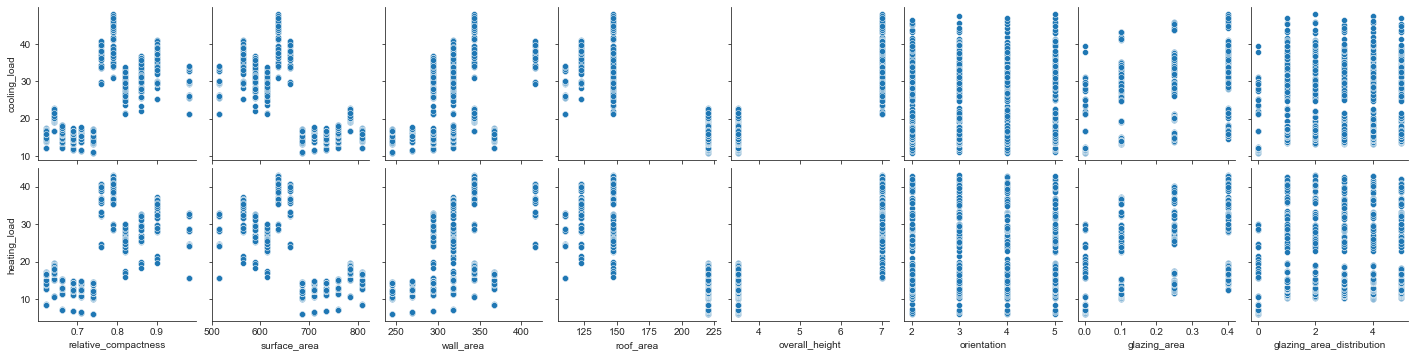

In [11]:
plt.figure(figsize=(5,5))
sns.pairplot(efficiency, y_vars=['cooling_load','heating_load'],
             x_vars=['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height','orientation', 'glazing_area', 'glazing_area_distribution',])
plt.show()

In [13]:
efficiency.var()

relative_compactness            0.011189
surface_area                 7759.163842
wall_area                    1903.269883
roof_area                    2039.963060
overall_height                  3.066493
orientation                     1.251630
glazing_area                    0.017748
glazing_area_distribution       2.405476
heating_load                  101.812050
cooling_load                   90.502983
dtype: float64

In [12]:
#Verileri Düzenleme
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
efficiency_scaler = pd.DataFrame(scaler.fit_transform(efficiency),columns=efficiency.columns)

In [ ]:
efficiency_scaler.head(5)

In [15]:
efficiency_scaler.var()

relative_compactness         1.001304
surface_area                 1.001304
wall_area                    1.001304
roof_area                    1.001304
overall_height               1.001304
orientation                  1.001304
glazing_area                 1.001304
glazing_area_distribution    1.001304
heating_load                 1.001304
cooling_load                 1.001304
dtype: float64

In [19]:
X = efficiency_scaler.drop(['heating_load','cooling_load'], axis = 1)
Y = efficiency_scaler[['heating_load','cooling_load']]


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state = 123)
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.20,random_state=42)

In [25]:
#DecisionTree Analizi

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

efficiency_model = DecisionTreeRegressor(random_state=123)
efficiency_model.fit(x_train, y_train)
y_pred = efficiency_model.predict(x_val)



In [29]:
print('Train success rate :',efficiency_model.score(x_train,y_train))
print('Validation success rate :',r2_score(y_val,y_pred))

Train success rate : 1.0
Validation success rate : 0.9713913790661038
